# 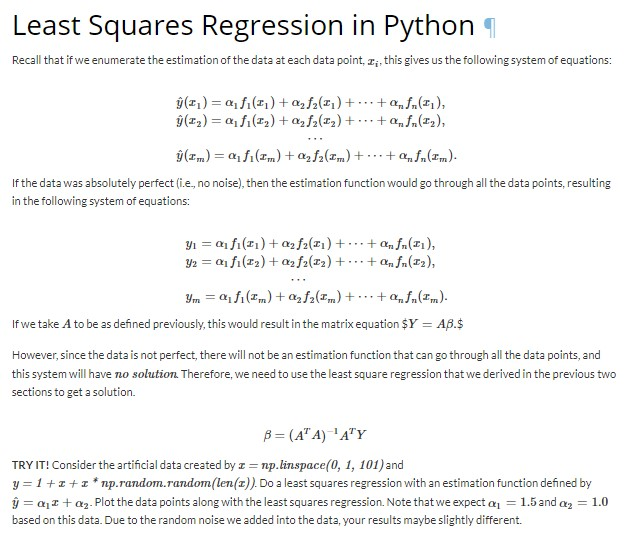

# **Use direct inverse method**

In [36]:
#from IPython.core.debugger import InterruptiblePdb as  ipdb
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
#%pdb on
#ipdb.set_trace(context=6)
#ipdb off
plt.style.use('seaborn-poster')



reza
izan


<ipython-input-36-a2b6c5f07c6b>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [2]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [6]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]